<a href="https://colab.research.google.com/github/iampundir/Spam-Detection-Mail-project/blob/master/Spam_detection_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


In [3]:
!ls

sample_data  spam.csv


**Exploratory Data Analysis**

In [25]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [28]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.rename(columns={"v1":"Label","v2":"Message"},inplace=True)

In [30]:
df.columns

Index(['Label', 'Message'], dtype='object')

In [31]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

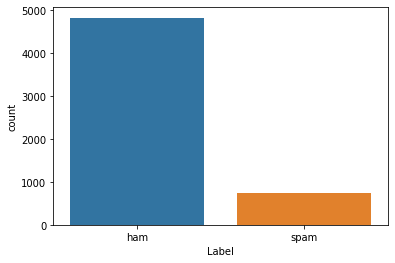

In [32]:
sns.countplot(x=df.Label)

In [33]:
df["Label"]=df.Label.map({"ham":0,"spam":1})

In [34]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Modelling**

In [35]:
#defining indipendent and dependent variables.
X=df["Message"]
y=df["Label"]

In [36]:
Count_vec=CountVectorizer()
X=Count_vec.fit_transform(X) #fit and transform the data

In [37]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [38]:
#lets fit our naive bayes classifier
NB=MultinomialNB()
NB.fit(X_train,y_train)
NB.score(X_test,y_test)
y_pred=NB.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.93      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1569,   18],
       [  20,  232]])

Lets try some some other models

**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)
y_pred_LR=LR.predict(X_test)
print(classification_report(y_test,y_pred_LR))
confusion_matrix(y_test,y_pred_LR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.99      0.86      0.92       252

    accuracy                           0.98      1839
   macro avg       0.98      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



array([[1584,    3],
       [  36,  216]])

**K Neighbours Classifier**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train,y_train)
Knn.score(X_test,y_test)
y_pred_knn=Knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
confusion_matrix(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1587
           1       0.99      0.63      0.77       252

    accuracy                           0.95      1839
   macro avg       0.97      0.82      0.87      1839
weighted avg       0.95      0.95      0.94      1839



array([[1586,    1],
       [  92,  160]])

**Ensemble Classifier:** **Random Forest**

In [76]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_jobs=-1)
Rf.fit(X_train,y_train)
Rf.score(X_test,y_test)
y_pred_Rf=Rf.predict(X_test)
print(classification_report(y_test,y_pred_Rf))
confusion_matrix(y_test,y_pred_Rf)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.82      0.90       252

    accuracy                           0.97      1839
   macro avg       0.99      0.91      0.94      1839
weighted avg       0.98      0.97      0.97      1839



array([[1587,    0],
       [  46,  206]])

**Adaboost:**

In [79]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(X_train,y_train)
Ada.score(X_test,y_test)
y_pred_Ada=Ada.predict(X_test)
print(classification_report(y_test,y_pred_Ada))
confusion_matrix(y_test,y_pred_Ada)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1587
           1       0.93      0.83      0.88       252

    accuracy                           0.97      1839
   macro avg       0.95      0.91      0.93      1839
weighted avg       0.97      0.97      0.97      1839



array([[1571,   16],
       [  43,  209]])

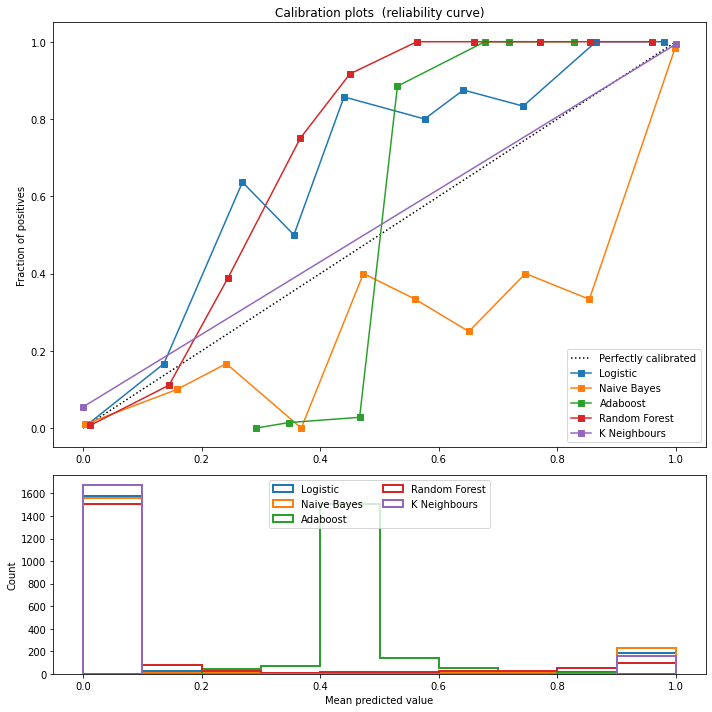

In [82]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(LR, 'Logistic'),
                  (NB, 'Naive Bayes'),
                  (Ada, 'Adaboost'),
                  (Rf, 'Random Forest'),
                  (Knn,"K Neighbours")]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

We can see that the Naive Bayes has best at classfiying the Spam and Ham mmessages in the mail .we have also used many other ensembe and classification models but none was better then the Multinomial Naive Bayes.

After training the model, it is desirable to have a way to persist the model for future use without having to retrain. To achieve this, we add the following lines to save our model as a .pkl file for the later use.

In [41]:
from sklearn.externals import joblib
joblib.dump(NB,"Spam_detection_proj.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Spam_detection_proj.pkl']

And we can load and use saved model later like so:

In [42]:
Spam_detection_proj=open("Spam_detection_proj.pkl","rb")
NB=joblib.load(Spam_detection_proj)

The above process called “persist model in a standard format”, that is, models are persisted in a certain format specific to the language in development.

And the model will be served in a micro-service that expose endpoints to receive requests from client. This is the next step.